# Bokwango-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'BKW'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [2]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_komplex.bef_art,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BKW%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# Anzahl Scherben:
df.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
BKW            11.0
BKW (?)        12.0
BKW/BOT (?)     1.0
All            24.0
Name: Anzahl, dtype: float64

In [3]:
# GE
df.loc[df['Anzahl'] == 1].pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)  # Anzahl GE

Typ
BKW            11.0
BKW (?)         6.0
BKW/BOT (?)     1.0
All            18.0
Name: objID, dtype: float64

In [4]:
# ausgezählte Scherben
df.loc[df['Anzahl'] != 1].pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
BKW (?)    6.0
All        6.0
Name: Anzahl, dtype: float64

In [5]:
df_pivot = df.pivot_table(values = 'objID', index = ['bef_art', 'Ort'], columns = 'Typ', aggfunc = len, margins = True)
df_pivot

Typ                                   BKW  BKW (?)  BKW/BOT (?)   All
bef_art Ort                                                          
Oberfl  Bokwango (Fpl. 190)           2.0      2.0          NaN   4.0
        Boyoka (Fpl. 196)             1.0      4.0          1.0   6.0
        Bruxelles-Nganda (Fpl. 186)   1.0      NaN          NaN   1.0
        Ilanga (Fpl. 192)             3.0      NaN          NaN   3.0
        Loka (Fpl. 193)               4.0      NaN          NaN   4.0
        Lokekya (Fpl. 188)            NaN      1.0          NaN   1.0
All                                  11.0      7.0          1.0  19.0

In [6]:
len(df_pivot.index)-1   # Anzahl der FdSt mit MKL-Keramik -1 (für die Summenzeile in der Tab. oben)

6

## Technologische Merkmale (*fabrics*)

In [14]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%BKW%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [15]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [16]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [17]:
df.pivot_table(values = 'Anzahl', index = 'Ort', columns = 'Fabric', aggfunc = sum)

Fabric,1a,1b,1d,1e,2a/1d (?),2b,3a/7d (?)
Ort,,,,,,,
Bokwango (Fpl. 190),1.0,NaN,2.0,NaN,1.0,NaN,NaN
Boyoka (Fpl. 196),NaN,NaN,3.0,1.0,NaN,1.0,6.0
Bruxelles-Nganda (Fpl. 186),NaN,NaN,1.0,NaN,NaN,NaN,NaN
Ilanga (Fpl. 192),NaN,2.0,1.0,NaN,NaN,NaN,NaN
Loka (Fpl. 193),NaN,NaN,4.0,NaN,NaN,NaN,NaN
Lokekya (Fpl. 188),1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1d,11,45.833333
3a/7d (?),6,25.000000
1a,2,8.333333
1b,2,8.333333
1e,1,4.166667


In [19]:
df.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)

MagerungDichte
       6
<1    18
Name: Anzahl, dtype: int64

In [20]:
df.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)

MagerungArt
      6
S    18
Name: Anzahl, dtype: int64

In [24]:
# nur die Hauptgruppe
df['FabricGr'] = df['Fabric'].str.extract('(\\d)')

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [28]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'FabricGr', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_values(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
FabricGr,,
1,16,66.666667
3,6,25.000000
2,2,8.333333


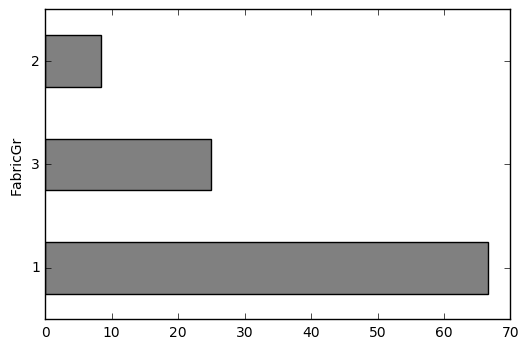

In [30]:
df_pivot['Prozent'].plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

### Brennfarbe

In [31]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%BKW%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,2,9.523810
Sonstig,6,28.571429
Weiß,13,61.904762


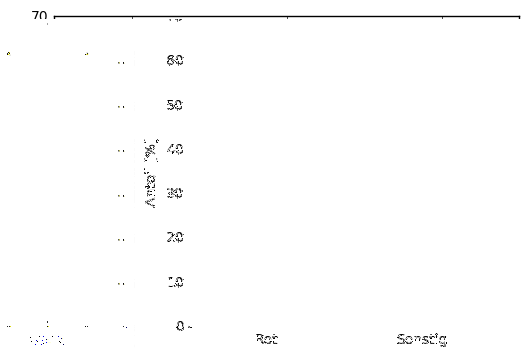

In [32]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

### Oberfläche der Scherben

In [33]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) = 'BKW'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Obfl
glatt    11
Name: Anzahl, dtype: int64

## Gefäßformen

In [34]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BKW%')
           AND ((t_Obj.Form_Gef) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# die Fragezeichen bei Gef-Form einfach löschen
# df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
# display(df.head())

In [35]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


Anzahl der Stücke, welche der 'Mokelo'-Gruppe zugewiesen werden könne und bei denen eine Gefäßeform ermittelt werden konnte:

In [36]:
df_pivot['objID'].sum()

12

Verteilung der Gefäßformen der 'Mokelo'-Gruppe:

In [37]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

> **Abb. #** Bokwango-Gruppe: Gefäßformen.

In [39]:
df.pivot_table(values = 'objID', index = 'ort_name', columns = 'Form_Gef', aggfunc = len, fill_value = '')

Form_Gef,G2 (?),G3,G3 (?),H2
ort_name,,,,
Bokwango,,,1,
Boyoka,,1,,1
Bruxelles-Nganda,,1,,
Ilanga,,,3,
Loka,,3,1,
Lokekya,1,,,


### Bauchform

In [45]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BKW%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [46]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
D1,5,41.666667
A1,3,25.000000
D2,2,16.666667
B1/E1/A1,1,8.333333
D1/B1,1,8.333333


In [47]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')
plt.show()

> **Abb. #** Bokwango-Gruppe: Gefäßbauch

### Korrelation Gef-Form & Bauchform

In [48]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Mündungs- & Randformen

In [68]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BKW%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [69]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M5,7,58.333333
M1,2,16.666667
M2,1,8.333333
M3,1,8.333333
M6/M1,1,8.333333


> **Tab. #** Bokwango-Gruppe: Mündungsformen

In [70]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,5,41.666667
A1,2,16.666667
B1/B2,2,16.666667
B1.1,1,8.333333
B1.1/B1,1,8.333333
C1,1,8.333333


> **Tab. #** Bokwango-Gruppe: Randformen

In [86]:
d = df[df['Form_Rand'].notnull()]
a = pd.Series({'ausbiegend':len(d[d['Form_Rand'].str.contains("B")].index),
               'sonst':len(d[~d['Form_Rand'].str.contains("B")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
ausbiegend,9,75.0
sonst,3,25.0


In [52]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

12

In [53]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

6

In [54]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

In [55]:
df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)

Form_Hals
B3/sehr kurz    1
X               7
X (?)           1
Name: objID, dtype: int64

In [56]:
df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)

Form_Schulter
A1       10
A1/A2     1
A2        1
Name: objID, dtype: int64

### Bodenformen

In [57]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BKW%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden
0,LKK,Lokekya,204,BKW (?),G2 (?),B15
1,BKW,Bokwango,1469,BKW,None,B15


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


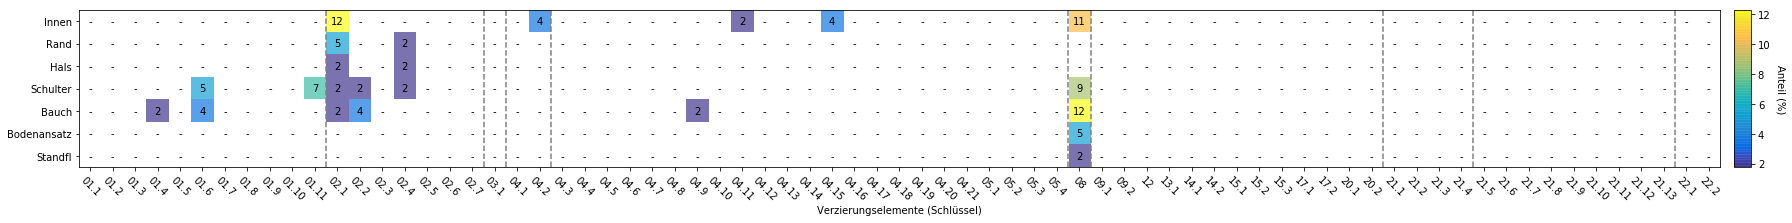

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-4_Bokwango_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [60]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%BKW%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [61]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

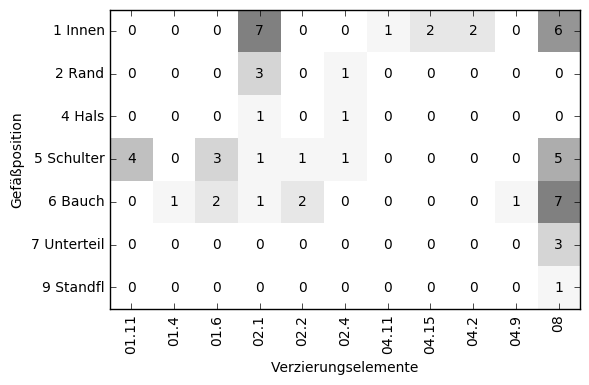

In [62]:
fig = plt.figure()
# fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-1-4_Bokwango_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [63]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [64]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')
#plt.title('Mokelo-Gruppe\nGefäßformen')
#plt.savefig('output/3-1-1-3_Mokelo-Gr_GefForm2.pdf')

## Verbreitung

In [65]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
2,Bruxelles-Nganda (Fpl. 186),186,17.720453,-0.377489,BKW
5,Lokekya (Fpl. 188),188,17.682388,-0.212557,BKW (?)
0,Bokwango (Fpl. 190),190,17.780500,0.102769,BKW
3,Ilanga (Fpl. 192),192,17.897891,0.284087,BKW
4,Loka (Fpl. 193),193,17.945614,0.320338,BKW
1,Boyoka (Fpl. 196),196,17.898659,1.089931,BKW


In [66]:
df.to_csv("../data/processed/3-1-1-4_BKW_Verbreitung.csv", index = False)

## Tafeln

In [87]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Mdg,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Mdg,Form_Boden
0,1,1,BRU,85/101,NaN,1,BKW,G3,B1,M5,None
1,1,2,LKK,85/101,NaN,NaN,BKW (?),G2 (?),A1,M6/M1,B15
2,2,1,BKW,85/101,NaN,NaN,BKW,None,B1.1,M1,B15
3,5,1,BYO,85/101,NaN,55,BKW,G3,B1/B2,M2,None
4,5,5,BYO,85/101,NaN,58,BKW/BOT (?),None,None,,None
